# Importing Required Libraries

In [10]:
import cv2

In [11]:
import numpy as np
import glob
import os
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D
from keras import optimizers
import scipy
import pylab as pl
import matplotlib.cm as cm
%matplotlib inline

# Importing Input  Images

In [3]:
#Importing Shirt Images
from os import listdir
from os.path import isfile, join
import numpy
import cv2

mypath="C:/Users/Fahad Ehtesham/Desktop/data Trained/FLIP ROBO/Web Scrapping/Train/Shirt"
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images_shirt = numpy.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
    images_shirt[n] = cv2.imread( join(mypath,onlyfiles[n]) )

In [4]:
images_shirt

array([array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254

In [5]:
for i in images_shirt:
    cv2.imshow('Shirt',i)
    cv2.waitKey(0)
cv2.destroyAllWindows()    

In [6]:
#Importing Tshirt Images
mypath1=r"C:\Users\Fahad Ehtesham\Desktop\data Trained\FLIP ROBO\Web Scrapping\Train\Tshirt"
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath1,f)) ]
images_Tshirt = numpy.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
    images_Tshirt[n] = cv2.imread( join(mypath1,onlyfiles[n]) )  

In [7]:
images_Tshirt

array([array([[[244, 239, 240],
        [244, 239, 240],
        [244, 239, 240],
        ...,
        [242, 237, 238],
        [242, 237, 238],
        [242, 237, 238]],

       [[244, 239, 240],
        [244, 239, 240],
        [244, 239, 240],
        ...,
        [242, 237, 238],
        [242, 237, 238],
        [242, 237, 238]],

       [[244, 239, 240],
        [244, 239, 240],
        [244, 239, 240],
        ...,
        [242, 237, 238],
        [242, 237, 238],
        [242, 237, 238]],

       ...,

       [[226, 221, 222],
        [226, 221, 222],
        [226, 221, 222],
        ...,
        [192, 191, 195],
        [192, 191, 195],
        [192, 191, 195]],

       [[226, 221, 222],
        [226, 221, 222],
        [226, 221, 222],
        ...,
        [192, 191, 195],
        [192, 191, 195],
        [192, 191, 195]],

       [[226, 221, 222],
        [226, 221, 222],
        [226, 221, 222],
        ...,
        [192, 191, 195],
        [192, 191, 195],
        [192, 191

In [8]:
for i in images_Tshirt:
    cv2.imshow('Tshirt',i)
    cv2.waitKey(0)
    cv2.destroyAllWindows()   

# Applying Augmentation Techniques

# 1.Rotation

In [9]:
m=0
os.mkdir('Rotated_shirt')
for i in  images_shirt:
    height,width=i.shape[:2]
    rotation_matrix=cv2.getRotationMatrix2D((width/2,height/2),30,.5)
    rotated_image=cv2.warpAffine(i,rotation_matrix,(width,height))
    cv2.imwrite("Rotated_shirt/image"+str(m)+".jpg",rotated_image)     
    m +=1
    #cv2.imshow('Rotated_image',rotated_image)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()    

In [10]:
m=0
os.mkdir('Rotated_tshirt')
for i in  images_Tshirt:
    height,width=i.shape[:2]
    rotation_matrix=cv2.getRotationMatrix2D((width/2,height/2),-30,.5)
    rotated_image=cv2.warpAffine(i,rotation_matrix,(width,height))
    cv2.imwrite("Rotated_tshirt/image"+str(m)+".jpg",rotated_image)     
    m +=1
    #cv2.imshow('Rotated_image',rotated_image)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows() 

# 2.Playing with Brightness

In [11]:
#Increasing the  shirts brightness
m=0
os.mkdir('inc_brightness_shirt')
for i in images_shirt:
    M=np.ones(i.shape,dtype="uint8")*100
    inc=cv2.add(i,M)
    #cv2.imshow("increasing_brightness",inc)
    cv2.imwrite("inc_brightness_shirt/image"+str(m)+".jpg",inc)
    m +=1


In [12]:
#Increasing the tshirt brightness
m=0
os.mkdir('inc_brightness_tshirt')
for i in images_Tshirt:
    M=np.ones(i.shape,dtype="uint8")*100
    inc=cv2.add(i,M)
    #cv2.imshow("increasing_brightness",inc)
    cv2.imwrite("inc_brightness_tshirt/image"+str(m)+".jpg",inc)
    m +=1


In [13]:
#Decreasing the brightness for shirt
m=0
os.mkdir('dec_brightness_shirt')
for i in images_shirt:
    M=np.ones(i.shape,dtype="uint8")*100
    inc=cv2.subtract(i,M)
    cv2.imwrite("dec_brightness_shirt/image"+str(m)+".jpg",inc)
    m +=1
    #cv2.imshow("increasing_brightness",inc)

In [14]:
#Decreasing the brightness for Tshirt
m=0
os.mkdir('dec_brightness_Tshirt')
for i in images_Tshirt:
    M=np.ones(i.shape,dtype="uint8")*100
    inc=cv2.subtract(i,M)
    cv2.imwrite("dec_brightness_Tshirt/image"+str(m)+".jpg",inc)
    m +=1
    #cv2.imshow("increasing_brightness",inc)

# 3.SHARPENING

In [15]:
#Creating Kernels for sharpening:
kernel=np.array([[-1,-1,-1],
                    [-1,10,-1],
                    [-1,-1,-1]])
m=0
os.mkdir('Sharpening_tshirt')
for i in images_Tshirt:
    sharped1=cv2.filter2D(i,-1,kernel)
    #cv2.imshow("increasing_brightness",inc)
    cv2.imwrite("Sharpening_tshirt/image"+str(m)+".jpg",sharped1)
    m +=1

In [16]:
#Creating Kernels for sharpening:
kernel=np.array([[-1,-1,-1],
                    [-1,10,-1],
                    [-1,-1,-1]])
m=0
os.mkdir('Sharpening_Shirt')
for i in images_shirt:
    sharped=cv2.filter2D(i,-1,kernel)
    cv2.imwrite("Sharpening_Shirt/image"+str(m)+".jpg",sharped)
    m +=1

# 4.FLIPPING

In [17]:
#Creating Kernels for sharpening:
m=0
os.mkdir('FLIP_tshirt')
for i in images_Tshirt:
    img_flip = cv2.flip(i, 1)
    #cv2.imshow("increasing_brightness",inc)
    cv2.imwrite("FLIP_tshirt/image"+str(m)+".jpg",img_flip)
    m +=1

k=0   
os.mkdir('Flip_Shirt')
for i in images_shirt:
    img_flip1 = cv2.flip(i, 1)
    cv2.imwrite("Flip_Shirt/image"+str(k)+".jpg",img_flip1)
    k +=1

# Importing Required Libraries for CNN

In [12]:
import numpy as np
import os
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D
from keras import optimizers
import scipy
import pylab as pl
import matplotlib.cm as cm
%matplotlib inline

In [13]:
input_shape=(100,100,3)
image_width=100
image_height=100
nb_train_samples=305
nb_validation_samples=80

batch_size= 10
epochs = 20

train_data_dir="C:/Users/Fahad Ehtesham/Desktop/data Trained/FLIP ROBO/Web Scrapping/Train"
validation_data_dir="C:/Users/Fahad Ehtesham/Desktop/data Trained/FLIP ROBO/Web Scrapping/Validation"

In [14]:
#Rescale the pixels values from [0,255] to [0,1] interval
datagen=ImageDataGenerator(rescale=1./255)

#automatically retrieves images and their classes for train and validation sets
train_generator=datagen.flow_from_directory(
                    train_data_dir,
                    target_size=(image_width,image_height),
                     batch_size=batch_size ,class_mode='binary')

validation_generator=datagen.flow_from_directory(
                    validation_data_dir,
                    target_size=(image_width,image_height),
                     batch_size=batch_size ,class_mode='binary')

Found 305 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


# Creating CNN

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)  

# Using SGD Optimiser on  Our CNN

In [7]:
import keras
import keras.utils
from keras import utils as np_utils
from keras.optimizers import SGD
#optimiser=SGD(learning_rate=0.01, momentum=0.8)
#optimizer = keras.optimizers.SGD(learning_rate=0.01,momentum=0.8)
Opt=keras.optimizers.SGD(lr=0.01, momentum=0.8)
model.compile(loss='binary_crossentropy',
              optimizer=Opt,
              metrics=['accuracy'])

In [8]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint=ModelCheckpoint(r'C:/Users/Fahad Ehtesham/Desktop/data Trained/FLIP ROBO/Web Scrapping/Tshirt_Shirt_sgd.h5',
                          monitor='val_loss',mode='min',
                           save_best_only=True,verbose=1)

early_stopping=EarlyStopping(monitor='val_loss',
                            min_delta=0,patience=4,verbose=1,restore_best_weights=True)

reduceLr=ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_delta=0.0001)

callbacks=[checkpoint,early_stopping,reduceLr]

In [9]:
history=model.fit_generator(train_generator,
                  steps_per_epoch=nb_train_samples//batch_size,
                  epochs=epochs,callbacks=callbacks,
                  validation_data=validation_generator,
                  validation_steps=nb_validation_samples//batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 4/30 [===>..........................] - ETA: 6:43 - loss: 0.7056 - acc: 0.5750

C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.434624). Check your callbacks.
  % delta_t_median)


30/30 [==============================] - 66s 2s/step - loss: 0.6688 - acc: 0.6067 - val_loss: 0.6345 - val_acc: 0.6750

Epoch 00001: val_loss improved from inf to 0.63448, saving model to C:/Users/Fahad Ehtesham/Desktop/data Trained/FLIP ROBO/Web Scrapping/Tshirt_Shirt_sgd.h5
Epoch 2/20
30/30 [==============================] - 4s 147ms/step - loss: 0.6559 - acc: 0.6268 - val_loss: 0.7029 - val_acc: 0.5500

Epoch 00002: val_loss did not improve from 0.63448
Epoch 3/20
30/30 [==============================] - 2s 65ms/step - loss: 0.5691 - acc: 0.7202 - val_loss: 0.5499 - val_acc: 0.7250

Epoch 00003: val_loss improved from 0.63448 to 0.54993, saving model to C:/Users/Fahad Ehtesham/Desktop/data Trained/FLIP ROBO/Web Scrapping/Tshirt_Shirt_sgd.h5
Epoch 4/20
30/30 [==============================] - 2s 61ms/step - loss: 0.4454 - acc: 0.7932 - val_loss: 0.6873 - val_acc: 0.5500

Epoch 00004: val_loss did not improve from 0.54993
Epoch 5/20
30/30 [==============================] - 2s 62ms/ste

In [10]:
history_dict=history.history

# Plotting Loss  vs Epochs

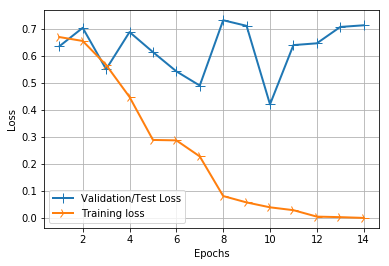

In [11]:
import matplotlib.pyplot as plt
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)

line1=plt.plot(epochs,val_loss_values,label='Validation/Test Loss')
line2=plt.plot(epochs,loss_values,label='Training loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Plotting Accuracy vs Epochs

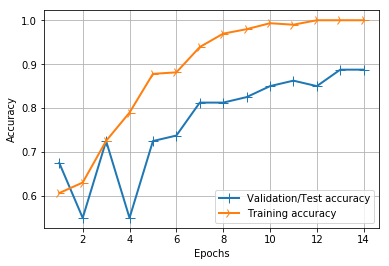

In [12]:
import matplotlib.pyplot as plt
accuracy=history_dict['acc']
val_accuracy_values=history_dict['val_acc']
epochs=range(1,len(accuracy)+1)

line1=plt.plot(epochs,val_accuracy_values,label='Validation/Test accuracy')
line2=plt.plot(epochs,accuracy,label='Training accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Using NAG Optimiser on  Our CNN

In [34]:
nb_train_samples=305
nb_validation_samples=80

batch_size= 15
epochs = 20

In [35]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 46, 46, 32)        18464     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 16928)             0         
__________

In [36]:
import keras
import keras.utils
from keras import utils as np_utils
from keras.optimizers import SGD
#optimiser=SGD(learning_rate=0.01, momentum=0.8)
#optimizer = keras.optimizers.SGD(learning_rate=0.01,momentum=0.8)
Opt=keras.optimizers.SGD(lr=0.01, momentum=0.8,nesterov=True)
model.compile(loss='binary_crossentropy',
              optimizer=Opt,
              metrics=['accuracy'])

# Defining CallBacks

In [37]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint=ModelCheckpoint(r'C:/Users/Fahad Ehtesham/Desktop/data Trained/FLIP ROBO/Web Scrapping/Tshirt_Shirt_NAG.h5',
                          monitor='val_loss',mode='min',
                           save_best_only=True,verbose=1)

early_stopping=EarlyStopping(monitor='val_loss',
                            min_delta=0,patience=4,verbose=1,restore_best_weights=True)

reduceLr=ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_delta=0.0001)

callbacks_NAG=[checkpoint,early_stopping,reduceLr]

In [38]:
history=model.fit_generator(train_generator,
                  steps_per_epoch=nb_train_samples//batch_size,
                  epochs=epochs,callbacks=callbacks_NAG,
                  validation_data=validation_generator,
                  validation_steps=nb_validation_samples//batch_size)

Epoch 1/20
20/20 [==============================] - 4s 192ms/step - loss: 0.6621 - acc: 0.6050 - val_loss: 0.5897 - val_acc: 0.6600

Epoch 00001: val_loss improved from inf to 0.58967, saving model to C:/Users/Fahad Ehtesham/Desktop/data Trained/FLIP ROBO/Web Scrapping/Tshirt_Shirt_NAG.h5
Epoch 2/20
20/20 [==============================] - 1s 60ms/step - loss: 0.5781 - acc: 0.7004 - val_loss: 0.6417 - val_acc: 0.6000

Epoch 00002: val_loss did not improve from 0.58967
Epoch 3/20
20/20 [==============================] - 1s 62ms/step - loss: 0.5466 - acc: 0.7249 - val_loss: 0.5586 - val_acc: 0.7200

Epoch 00003: val_loss improved from 0.58967 to 0.55863, saving model to C:/Users/Fahad Ehtesham/Desktop/data Trained/FLIP ROBO/Web Scrapping/Tshirt_Shirt_NAG.h5
Epoch 4/20
20/20 [==============================] - 1s 63ms/step - loss: 0.6069 - acc: 0.7500 - val_loss: 0.6435 - val_acc: 0.6600

Epoch 00004: val_loss did not improve from 0.55863
Epoch 5/20
20/20 [==============================] -

In [39]:
history_dict_nag=history.history

# Plotting Loss vs Epochs

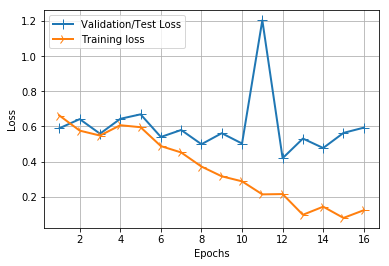

In [40]:
import matplotlib.pyplot as plt
loss_values=history_dict_nag['loss']
val_loss_values=history_dict_nag['val_loss']
epochs=range(1,len(loss_values)+1)

line1=plt.plot(epochs,val_loss_values,label='Validation/Test Loss')
line2=plt.plot(epochs,loss_values,label='Training loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Plotting Accuracy vs Epochs

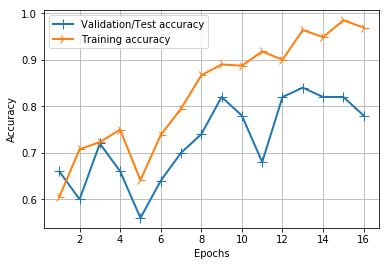

In [41]:
import matplotlib.pyplot as plt
accuracy=history_dict_nag['acc']
val_accuracy_values=history_dict_nag['val_acc']
epochs=range(1,len(accuracy)+1)

line1=plt.plot(epochs,val_accuracy_values,label='Validation/Test accuracy')
line2=plt.plot(epochs,accuracy,label='Training accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Using RMSPROP Optimiser on  Our CNN

In [13]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation('sigmoid'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16928)             0         
__________

# Defining CallBacks

In [14]:
import keras
import keras.utils
from keras import utils as np_utils
from keras.optimizers import SGD
model.compile(loss='binary_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint=ModelCheckpoint(r'C:/Users/Fahad Ehtesham/Desktop/data Trained/FLIP ROBO/Web Scrapping/Tshirt_Shirt_rms.h5',
                          monitor='val_loss',mode='min',
                           save_best_only=True,verbose=1)

early_stopping=EarlyStopping(monitor='val_loss',
                            min_delta=0,patience=4,verbose=1,restore_best_weights=True)

reduceLr=ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_delta=0.0001)

callbacks_rmsprop=[checkpoint,early_stopping,reduceLr]

In [15]:
nb_train_samples=305
nb_validation_samples=80
batch_size= 25
epochs = 20
history=model.fit_generator(train_generator,
                  steps_per_epoch=nb_train_samples//batch_size,
                  epochs=epochs,callbacks=callbacks_rmsprop,
                  validation_data=validation_generator,
                  validation_steps=nb_validation_samples//batch_size)

Epoch 1/20
12/12 [==============================] - 3s 220ms/step - loss: 0.9906 - acc: 0.6906 - val_loss: 0.6711 - val_acc: 0.6000

Epoch 00001: val_loss improved from inf to 0.67107, saving model to C:/Users/Fahad Ehtesham/Desktop/data Trained/FLIP ROBO/Web Scrapping/Tshirt_Shirt_rms.h5
Epoch 2/20
12/12 [==============================] - 1s 63ms/step - loss: 0.6413 - acc: 0.6167 - val_loss: 0.6592 - val_acc: 0.6000

Epoch 00002: val_loss improved from 0.67107 to 0.65918, saving model to C:/Users/Fahad Ehtesham/Desktop/data Trained/FLIP ROBO/Web Scrapping/Tshirt_Shirt_rms.h5
Epoch 3/20
12/12 [==============================] - 1s 72ms/step - loss: 0.5966 - acc: 0.7010 - val_loss: 0.6310 - val_acc: 0.5333

Epoch 00003: val_loss improved from 0.65918 to 0.63100, saving model to C:/Users/Fahad Ehtesham/Desktop/data Trained/FLIP ROBO/Web Scrapping/Tshirt_Shirt_rms.h5
Epoch 4/20
12/12 [==============================] - 1s 65ms/step - loss: 0.5341 - acc: 0.7250 - val_loss: 0.6995 - val_acc: 

In [16]:
history_dict_rmsprop=history.history

# Plotting Loss vs Epochs

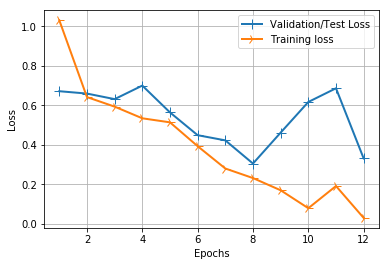

In [17]:
import matplotlib.pyplot as plt
loss_values=history_dict_rmsprop['loss']
val_loss_values=history_dict_rmsprop['val_loss']
epochs=range(1,len(loss_values)+1)
line1=plt.plot(epochs,val_loss_values,label='Validation/Test Loss')
line2=plt.plot(epochs,loss_values,label='Training loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Plotting Accuracy vs Epochs

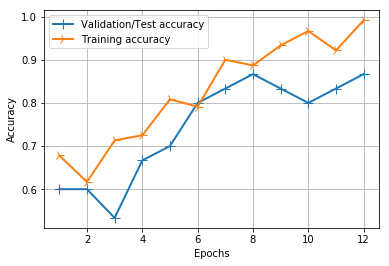

In [18]:
import matplotlib.pyplot as plt
accuracy=history_dict_rmsprop['acc']
val_accuracy_values=history_dict_rmsprop['val_acc']
epochs=range(1,len(accuracy)+1)

line1=plt.plot(epochs,val_accuracy_values,label='Validation/Test accuracy')
line2=plt.plot(epochs,accuracy,label='Training accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Using Adam Optimiser on  Our CNN

In [16]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(64))
model1.add(Activation('relu'))
model1.add(Dropout(0.25))
model1.add(Dense(1))
model1.add(Activation('sigmoid'))
print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 23, 23, 32)        0         
__________

# Defining CallBacks

In [18]:
import keras
import keras.utils
from keras import utils as np_utils
from keras.optimizers import SGD
model1.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint=ModelCheckpoint(r'C:/Users/Fahad Ehtesham/Desktop/data Trained/FLIP ROBO/Web Scrapping/Tshirt_Shirt_adam.h5',
                          monitor='val_loss',mode='min',
                           save_best_only=True,verbose=1)

early_stopping=EarlyStopping(monitor='val_loss',
                            min_delta=0,patience=4,verbose=1,restore_best_weights=True)

reduceLr=ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_delta=0.0001)

callbacks_adam=[checkpoint,early_stopping,reduceLr]

In [19]:
nb_train_samples=305
nb_validation_samples=80
batch_size= 30
epochs = 20
history=model1.fit_generator(train_generator,
                  steps_per_epoch=nb_train_samples//batch_size,
                  epochs=epochs,callbacks=callbacks_adam,
                  validation_data=validation_generator,
                  validation_steps=nb_validation_samples//batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
 4/10 [===========>..................] - ETA: 1:37 - loss: 1.0197 - acc: 0.6000

C:\Users\Fahad Ehtesham\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (1.006121). Check your callbacks.
  % delta_t_median)


10/10 [==============================] - 66s 7s/step - loss: 0.8610 - acc: 0.5600 - val_loss: 0.6683 - val_acc: 0.6500

Epoch 00001: val_loss improved from inf to 0.66827, saving model to C:/Users/Fahad Ehtesham/Desktop/data Trained/FLIP ROBO/Web Scrapping/Tshirt_Shirt_adam.h5
Epoch 2/20
10/10 [==============================] - 1s 71ms/step - loss: 0.6073 - acc: 0.6800 - val_loss: 0.6394 - val_acc: 0.6500

Epoch 00002: val_loss improved from 0.66827 to 0.63944, saving model to C:/Users/Fahad Ehtesham/Desktop/data Trained/FLIP ROBO/Web Scrapping/Tshirt_Shirt_adam.h5
Epoch 3/20
10/10 [==============================] - 1s 71ms/step - loss: 0.4503 - acc: 0.7800 - val_loss: 0.3788 - val_acc: 0.8500

Epoch 00003: val_loss improved from 0.63944 to 0.37882, saving model to C:/Users/Fahad Ehtesham/Desktop/data Trained/FLIP ROBO/Web Scrapping/Tshirt_Shirt_adam.h5
Epoch 4/20
10/10 [==============================] - 1s 104ms/step - loss: 0.2791 - acc: 0.8904 - val_loss: 0.3900 - val_acc: 0.7500

E

In [20]:
history_dict_adam=history.history

# Plotting Loss vs Epochs

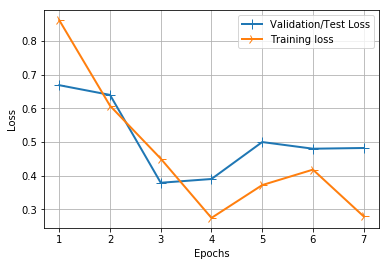

In [21]:
import matplotlib.pyplot as plt
loss_values=history_dict_adam['loss']
val_loss_values=history_dict_adam['val_loss']
epochs=range(1,len(loss_values)+1)
line1=plt.plot(epochs,val_loss_values,label='Validation/Test Loss')
line2=plt.plot(epochs,loss_values,label='Training loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Plotting Accuracy vs Epochs

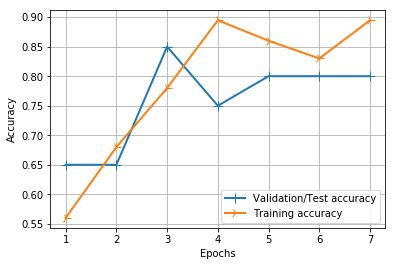

In [22]:
import matplotlib.pyplot as plt
accuracy=history_dict_adam['acc']
val_accuracy_values=history_dict_adam['val_acc']
epochs=range(1,len(accuracy)+1)

line1=plt.plot(epochs,val_accuracy_values,label='Validation/Test accuracy')
line2=plt.plot(epochs,accuracy,label='Training accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Using NADAM Optimiser on  Our CNN

In [25]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 46, 46, 32)        18464     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 16928)             0         
__________

# Defining CallBacks

In [119]:
import keras
import keras.utils
from keras import utils as np_utils
from keras.optimizers import SGD
model.compile(loss='binary_crossentropy',
              optimizer='Nadam',
              metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

checkpoint=ModelCheckpoint(r'C:/Users/Fahad Ehtesham/Desktop/data Trained/FLIP ROBO/Web Scrapping/Tshirt_Shirt_Nadam.h5',
                          monitor='val_loss',mode='min',
                           save_best_only=True,verbose=1)

early_stopping=EarlyStopping(monitor='val_loss',
                            min_delta=0,patience=4,verbose=1,restore_best_weights=True)

reduceLr=ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=3,verbose=1,min_delta=0.0001)

callbacks_Nadam=[checkpoint,early_stopping,reduceLr]

# Fitting The model

In [120]:
nb_train_samples=305
nb_validation_samples=80
batch_size= 15
epochs = 20
history=model.fit_generator(train_generator,
                  steps_per_epoch=nb_train_samples//batch_size,
                  epochs=epochs,callbacks=callbacks_Nadam,
                  validation_data=validation_generator,
                  validation_steps=nb_validation_samples//batch_size)

Epoch 1/20
20/20 [==============================] - 5s 273ms/step - loss: 0.8434 - acc: 0.6150 - val_loss: 0.6307 - val_acc: 0.6400

Epoch 00001: val_loss improved from inf to 0.63066, saving model to C:/Users/Fahad Ehtesham/Desktop/data Trained/FLIP ROBO/Web Scrapping/Tshirt_Shirt_Nadam.h5
Epoch 2/20
20/20 [==============================] - 1s 60ms/step - loss: 0.6835 - acc: 0.5950 - val_loss: 0.6351 - val_acc: 0.7400

Epoch 00002: val_loss did not improve from 0.63066
Epoch 3/20
20/20 [==============================] - 1s 62ms/step - loss: 0.8632 - acc: 0.6949 - val_loss: 0.7177 - val_acc: 0.5400

Epoch 00003: val_loss did not improve from 0.63066
Epoch 4/20
20/20 [==============================] - 1s 63ms/step - loss: 0.5042 - acc: 0.7650 - val_loss: 0.5656 - val_acc: 0.7000

Epoch 00004: val_loss improved from 0.63066 to 0.56557, saving model to C:/Users/Fahad Ehtesham/Desktop/data Trained/FLIP ROBO/Web Scrapping/Tshirt_Shirt_Nadam.h5
Epoch 5/20
20/20 [=============================

In [121]:
history_dict_Nadam=history.history

# Plotting Loss vs Epochs

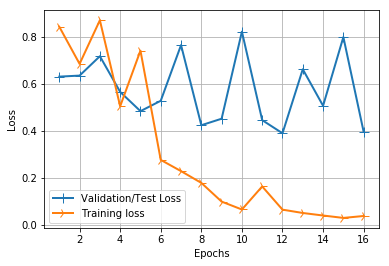

In [122]:
import matplotlib.pyplot as plt
loss_values=history_dict_Nadam['loss']
val_loss_values=history_dict_Nadam['val_loss']
epochs=range(1,len(loss_values)+1)
line1=plt.plot(epochs,val_loss_values,label='Validation/Test Loss')
line2=plt.plot(epochs,loss_values,label='Training loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Plotting Accuracy vs Epochs

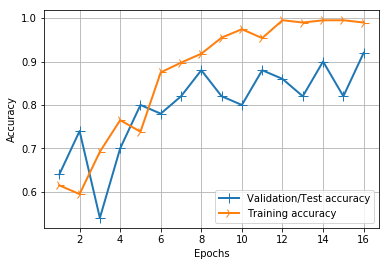

In [123]:
import matplotlib.pyplot as plt
accuracy=history_dict_Nadam['acc']
val_accuracy_values=history_dict_Nadam['val_acc']
epochs=range(1,len(accuracy)+1)

line1=plt.plot(epochs,val_accuracy_values,label='Validation/Test accuracy')
line2=plt.plot(epochs,accuracy,label='Training accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Testing the prediction on adam optimised model

In [149]:
from keras.models import load_model
from keras.preprocessing import image
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
import re

def draw_test(name,pred,im,true_label):
    BLACK=[0,0,0]
    expanded_image=cv2.copyMakeBorder(im,160,0,0,500,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image,'predicted-'+ pred,(20,60),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    cv2.putText(expanded_image,'true-'+ true_label,(20,120),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    cv2.imshow(name,expanded_image)

In [150]:
def getrandomimage(path,img_width,img_height):
    folders=list(filter(lambda x :os.path.isdir(os.path.join(path,x)),os.listdir(path)))
    random_directory=np.random.randint(0,len(folders))
    path_class=folders[random_directory]
    file_path=path+path_class
    file_names=[f for f in listdir(file_path) if  isfile(join(file_path,f))]
    random_file_index=np.random.randint(0,len(file_names))
    image_name=file_names[random_file_index]
    final_path=file_path+'/'+ image_name
    return image.load_img(final_path,target_size=(img_width,img_height)),final_path,path_class

In [151]:
class_labels=validation_generator.class_indices
class_labels={v: k for k , v, in class_labels.items()}

img_width,img_height=100,100
files=[]
prediction=[]
pred1=[]
true_labels=[]
for i in range(0,10):
    path="./Validation/"
    img,final_path,true_label=getrandomimage(path,img_width,img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x=image.img_to_array(img)
    x=x*1./255
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    classes=model1.predict_classes(images,batch_size=10)
    prediction.append(classes)

    

In [154]:
for i in range(0,len(files)):
    #print(i)
    image=cv2.imread(files[i])
    draw_test('predictions',class_labels[prediction[i][0][0]],image,true_labels[i])
    cv2.waitKey(0)
    
cv2.destroyAllWindows()